# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/luo_gait_2025/results/prelim_result_boxplot'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/luo_gait_2025/gait_optimization_patients.xlsx'
sheet = "Sheet1"

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,MRN,Subject,Trial,Setting,Total_Walk_Time__s_,Total_Frozen_Time__s_,Total_Turning_Time__s_,Total_Sit_Stand_Time__s_,Total_Time_Turning_Right__s_,Total_Time_Turning_Left__s_,...,Did_this_improve_your_gait__Y_N_M__,Did_this_improve_your_freezing__Y_N_M_,Did_it_improve_ability_to_get_started__Y_N_M_,Notes,On_Med,Rigidity,Total_Walk_Time____Baseline_,Total_Frozen_Time____Baseline_,Total_Turning_Time____Baseline_,Total_Sit_Stand_Time____Baseline_
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+,0.688889,0.214286,0.210000,0.350
1,NaN,1,2.0,Clinical,45.0,14.0,8.0,20.0,20.0,20.0,...,M,M,M,NaN,0.0,1+,1.000000,1.000000,1.000000,1.000
2,NaN,1,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Left sided DBS. No tracts available. 3 setting...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,M,Y,Y,NaN,0.0,NaN,0.822222,0.500000,0.357143,1.000
4,NaN,2,2.0,Clinical,90.0,25.0,14.0,5.0,NaN,NaN,...,M,N,N,NaN,0.0,NaN,1.000000,1.000000,1.000000,1.000
5,NaN,2,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GPI DBS. No tracts available.,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI,20.0,0.0,1.0,1.0,6.0,6.0,...,Y,Y,Y,NaN,NaN,NaN,0.869565,0.000000,0.250000,0.125
8,NaN,3,1.0,Clinical,23.0,1.0,4.0,8.0,6.0,8.0,...,N,N,NaN,Dystonia in l/R LE,NaN,"2+ RLE, 0 thers",1.000000,1.000000,1.000000,1.000
9,NaN,3,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

In [5]:
drop_list = ["Total_Walk_Time__s_"]

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,MRN,Subject,Trial,Setting,Total_Walk_Time__s_,Total_Frozen_Time__s_,Total_Turning_Time__s_,Total_Sit_Stand_Time__s_,Total_Time_Turning_Right__s_,Total_Time_Turning_Left__s_,...,Did_this_improve_your_gait__Y_N_M__,Did_this_improve_your_freezing__Y_N_M_,Did_it_improve_ability_to_get_started__Y_N_M_,Notes,On_Med,Rigidity,Total_Walk_Time____Baseline_,Total_Frozen_Time____Baseline_,Total_Turning_Time____Baseline_,Total_Sit_Stand_Time____Baseline_
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+,0.688889,0.214286,0.210000,0.350
1,NaN,1,2.0,Clinical,45.0,14.0,8.0,20.0,20.0,20.0,...,M,M,M,NaN,0.0,1+,1.000000,1.000000,1.000000,1.000
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,M,Y,Y,NaN,0.0,NaN,0.822222,0.500000,0.357143,1.000
4,NaN,2,2.0,Clinical,90.0,25.0,14.0,5.0,NaN,NaN,...,M,N,N,NaN,0.0,NaN,1.000000,1.000000,1.000000,1.000
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI,20.0,0.0,1.0,1.0,6.0,6.0,...,Y,Y,Y,NaN,NaN,NaN,0.869565,0.000000,0.250000,0.125
8,NaN,3,1.0,Clinical,23.0,1.0,4.0,8.0,6.0,8.0,...,N,N,NaN,Dystonia in l/R LE,NaN,"2+ RLE, 0 thers",1.000000,1.000000,1.000000,1.000


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

Set the parameters for dropping rows

In [39]:
column = 'Setting'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = "Clinical" # The value to drop if T

In [40]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,MRN,Subject,Trial,Setting,Total_Walk_Time__s_,Total_Frozen_Time__s_,Total_Turning_Time__s_,Total_Sit_Stand_Time__s_,Total_Time_Turning_Right__s_,Total_Time_Turning_Left__s_,...,Did_this_improve_your_gait__Y_N_M__,Did_this_improve_your_freezing__Y_N_M_,Did_it_improve_ability_to_get_started__Y_N_M_,Notes,On_Med,Rigidity,Total_Walk_Time____Baseline_,Total_Frozen_Time____Baseline_,Total_Turning_Time____Baseline_,Total_Sit_Stand_Time____Baseline_
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+,0.688889,0.214286,0.210000,0.350
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,M,Y,Y,NaN,0.0,NaN,0.822222,0.500000,0.357143,1.000
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI,20.0,0.0,1.0,1.0,6.0,6.0,...,Y,Y,Y,NaN,NaN,NaN,0.869565,0.000000,0.250000,0.125


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [41]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

In [42]:
# Remove anything you don't want to standardize
cols_not_to_standardize = [] #['Age']
# drop_list = ['CorrWithSiddiqiMap', 'depression_raw_baeline', 'depression_raw_follow_up']

In [43]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

,MRN,Subject,Trial,Setting,Total_Walk_Time__s_,Total_Frozen_Time__s_,Total_Turning_Time__s_,Total_Sit_Stand_Time__s_,Total_Time_Turning_Right__s_,Total_Time_Turning_Left__s_,...,Did_this_improve_your_gait__Y_N_M__,Did_this_improve_your_freezing__Y_N_M_,Did_it_improve_ability_to_get_started__Y_N_M_,Notes,On_Med,Rigidity,Total_Walk_Time____Baseline_,Total_Frozen_Time____Baseline_,Total_Turning_Time____Baseline_,Total_Sit_Stand_Time____Baseline_
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+,0.688889,0.214286,0.210000,0.350
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,M,Y,Y,NaN,0.0,NaN,0.822222,0.500000,0.357143,1.000
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI,20.0,0.0,1.0,1.0,6.0,6.0,...,Y,Y,Y,NaN,NaN,NaN,0.869565,0.000000,0.250000,0.125


In [44]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

Regress out Covariate

In [45]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = lis
# regressors = ['Age', 'Sex']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Edit Column Values

In [46]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

In [47]:
from calvin_utils.file_utils.dataframe_utilities import convert_to_ordinal
# data_df, map = convert_to_ordinal(data_df, ['Frequency__Hz_', 'Stim_Relative_to_Memory_Cycle', 'Sensory_Domain', 'Location_Agg', 'Mean_Age', 'Disease', 'study'])

Normalize Column Values

# Melt DF to Prep for Plotting

In [48]:
data_df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Total_Walk_Time__s_',
       'Total_Frozen_Time__s_', 'Total_Turning_Time__s_',
       'Total_Sit_Stand_Time__s_', 'Total_Time_Turning_Right__s_',
       'Total_Time_Turning_Left__s_', 'Asymmetric_Gait_Present',
       'Gait_Instability_Present', 'Wide_Base_Present',
       'Parkinsonian_Gait__slow__shuffling__hesitant__freeze_',
       'Ataxic_Gait__Incoord_Veering_H_S___',
       'Sensory_Gait__H_S__w_eyes_closed_',
       'Hemiparetic_Gait__UMN_signs__paretic_',
       'Steppage_Gait__Steppage__foot_drop_', 'Rigid___Dystonic_Gait',
       'Did_this_improve_your_gait__Y_N_M__',
       'Did_this_improve_your_freezing__Y_N_M_',
       'Did_it_improve_ability_to_get_started__Y_N_M_', 'Notes', 'On_Med',
       'Rigidity', 'Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
      dtype='object')

In [62]:
melted_df = data_df.melt(id_vars=["Setting"],
               value_vars=['Total_Walk_Time____Baseline_',
       'Total_Frozen_Time____Baseline_', 'Total_Turning_Time____Baseline_',
       'Total_Sit_Stand_Time____Baseline_'],
               var_name="Test",
               value_name="Time (% Baseline)")
melted_df

,Setting,Test,Time (% Baseline)
0,fMRI,Total_Walk_Time____Baseline_,0.688889
1,fMRI,Total_Walk_Time____Baseline_,0.822222
2,fMRI,Total_Walk_Time____Baseline_,NaN
3,fMRI,Total_Walk_Time____Baseline_,0.869565
4,fMRI,Total_Frozen_Time____Baseline_,0.214286
5,fMRI,Total_Frozen_Time____Baseline_,0.500000
6,fMRI,Total_Frozen_Time____Baseline_,NaN
7,fMRI,Total_Frozen_Time____Baseline_,0.000000
8,fMRI,Total_Turning_Time____Baseline_,0.210000
9,fMRI,Total_Turning_Time____Baseline_,0.357143


# Generate Plot

In [75]:
import os
from typing import Optional
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

class QuickPlot:
    """
    Minimal plotting helper operating directly on a DataFrame.
    - line(): line plot where each unique value in `hue` is a trace; optional `cohort` to split styling.
    - bar():  bar plot with same API.
    """

    def __init__(self, df: pd.DataFrame, x: str, y: str, hue: str, cohort: Optional[str] = None, errorbar: Optional[str] = "se", title: Optional[str] = None, out_dir: Optional[str] = None, font_family: str = "Helvetica", font_size: int = 16):
        self.df = self._clean_df(df)
        self.x = x
        self.y = y
        self.hue = hue
        self.cohort = cohort
        self.errorbar = errorbar
        self.title = title
        self.save = out_dir
        sns.set_theme(style="whitegrid")
        mpl.rcParams["font.family"] = font_family
        mpl.rcParams["font.size"] = font_size
    
    def _clean_df(self, df):
        # Create a copy to avoid modifying the original DataFrame
        cleaned_df = df.copy()
        
        # Replace underscores with spaces in all string columns
        for column in cleaned_df.columns:
            if cleaned_df[column].dtype == 'object':
                cleaned_df[column] = cleaned_df[column].str.replace('_', ' ')
                
        # Replace underscores in string values of non-object columns
        for column in cleaned_df.columns:
            if cleaned_df[column].dtype != 'object':
                cleaned_df[column] = cleaned_df[column].astype(str).str.replace('_', ' ')
                # Convert back to original dtype if possible
                try:
                    cleaned_df[column] = cleaned_df[column].astype(df[column].dtype)
                except:
                    pass
        
        return cleaned_df
        

    def plot(self, figsize=(9,6), plot_type="line"):
        """Plot: which plot type. 'line' | 'bar' """
        plt.figure(figsize=figsize)
        if plot_type=="line":
            if self.cohort:
                # Different colors per cohort (tab10), line style per hue
                ax = sns.lineplot(
                    data=self.df, x=self.x, y=self.y,
                    hue=self.cohort, style=self.hue,
                    markers=True, dashes=False, linewidth=2,
                    palette="tab10", errorbar=self.errorbar,
                )
                leg_title = f"{self.cohort} / {self.hue}"
            else:
                ax = sns.lineplot(
                    data=self.df, x=self.x, y=self.y,
                    hue=self.hue, markers=True, dashes=False,
                    linewidth=2, palette="tab10", errorbar=self.errorbar,
                )
                leg_title = self.hue
        elif plot_type=="bar":
            if self.cohort:
                # Color by cohort; separate bars within each group by hue
                ax = sns.barplot(
                    data=self.df, x=self.x, y=self.y,
                    hue=self.hue, palette="tab10", errorbar=self.errorbar,
                )
                ax.legend(title=self.hue, frameon=False)
            else:
                ax = sns.barplot(
                    data=self.df, x=self.x, y=self.y,
                    hue=self.hue, palette="tab10", errorbar=self.errorbar,
                )
                ax.legend(title=self.hue, frameon=False)
        ax.set_xticklabels(["3 Meter Walk", "Time Frozen", "Time Turning", "Time in Sit-Stand"])
        ax.set_xlabel(self.x)
        ax.set_ylabel(self.y)
        ax.set_ylim((0, 1.2))
        plt.setp(ax.get_lines(), linewidth=2)
        ax.set_title(self.title or f"{self.y} by {self.x}")
        ax.legend(title=leg_title, frameon=False)
        sns.despine()
        plt.grid(False)
        if self.save:
            os.makedirs(os.path.dirname(self.save), exist_ok=True)
            plt.savefig(self.save + '.svg', bbox_inches="tight", format='svg', dpi=300)
        plt.show()

In [76]:
melted_df

,Setting,Test,Time (% Baseline)
0,fMRI,Total_Walk_Time____Baseline_,0.688889
1,fMRI,Total_Walk_Time____Baseline_,0.822222
2,fMRI,Total_Walk_Time____Baseline_,NaN
3,fMRI,Total_Walk_Time____Baseline_,0.869565
4,fMRI,Total_Frozen_Time____Baseline_,0.214286
5,fMRI,Total_Frozen_Time____Baseline_,0.500000
6,fMRI,Total_Frozen_Time____Baseline_,NaN
7,fMRI,Total_Frozen_Time____Baseline_,0.000000
8,fMRI,Total_Turning_Time____Baseline_,0.210000
9,fMRI,Total_Turning_Time____Baseline_,0.357143


In [77]:
x = 'Test'
y = 'Time (% Baseline)'
hue = 'Setting'
cohort = None

**Lineplot**

/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cu13

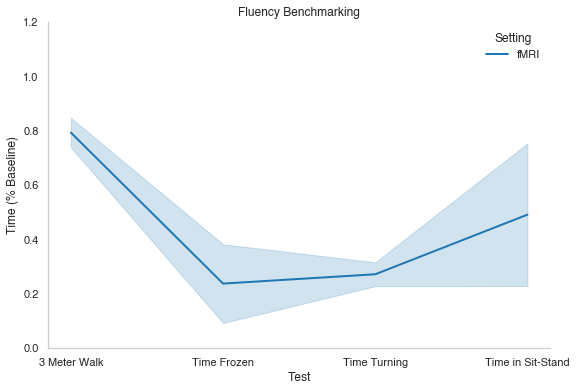

In [78]:
QuickPlot(melted_df, x, y, hue, cohort, title="Fluency Benchmarking", out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/luo_gait_2025/results/prelim_result_boxplot').plot()